# Will It Sell? – Sales Forecast Notebook
Predict next‑month sales in under 2 minutes. 🔧 Feel free to tweak parameters and re‑run!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

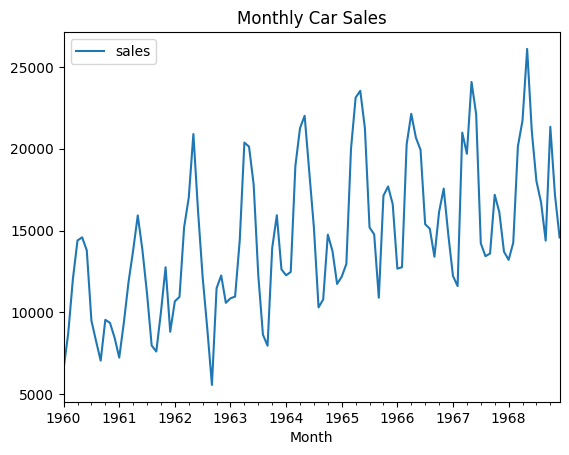

In [4]:
url = "/Users/saketmalviya/project/will_it_sell/data/sales_data.csv"
df = pd.read_csv(url, parse_dates=["Month"]).rename(columns={"Sales": "sales"})

df.plot(x="Month", y="sales", title="Monthly Car Sales")
plt.show()

In [5]:
# Create 12 lag features
for lag in range(1, 13):
    df[f"lag_{lag}"] = df["sales"].shift(lag)
df.dropna(inplace=True)

# Prepare train/test sets
X = df[[f"lag_{l}" for l in range(1, 13)]]
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [6]:
# Train Random Forest
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


MAE: 1726.3


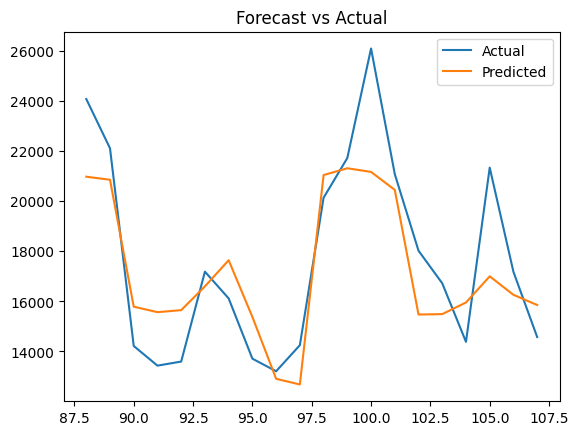

In [7]:
# Evaluate model
y_pred = model.predict(X_test)
print("MAE:", round(mean_absolute_error(y_test, y_pred), 1))

plt.figure()
plt.plot(y_test.index, y_test, label="Actual")
plt.plot(y_test.index, y_pred, label="Predicted")
plt.legend(); plt.title("Forecast vs Actual"); plt.show()

In [8]:
# 🔧 Try It: change n_estimators and re-run this cell + the training cell above
n_trees = 50
model = RandomForestRegressor(n_estimators=n_trees, random_state=42)
model.fit(X_train, y_train)

,n_estimators,50
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False
